Sky Kapoor and Chris Compierchio

This program will build upon Newman's exercise 8.8 to test the adaptive step size approach.

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import time

PARTS A AND B

In [110]:
#Set M and L
M = 10.
L = 2.

#Code from Newman 8-8 file, pasted to access plots
def rhs(r):
    """ The right-hand-side of the equations
    INPUT:
    r = [x, vx, y, vy] are floats (not arrays)
    note: no explicit dependence on time
    OUTPUT:
    1x2 numpy array, rhs[0] is for x, rhs[1] is for vx, etc"""
    

    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]

    r2 = x**2 + y**2
    Fx = -M*x/r2/np.sqrt(r2 + L**2/4)
    Fy = -M*y/r2/np.sqrt(r2 + L**2/4)
    return np.array([vx, vy, Fx, Fy], float)

In [115]:
#start timer
initial0 = time.time()

# %% This next part adapted from Newman's odesim.py --------------------------|
a = 0.0
b = 10.0
N = 10000  # let's leave it at that for now
h = (b-a)/N

tpoints = np.arange(a, b, h)
xpoints = []
vxpoints = []  # the future dx/dt
ypoints = []
vypoints = []  # the future dy/dt

# below: ordering is x, dx/dt, y, dy/dt
r = np.array([1., 0., 0., 1.], float)
for t in tpoints:
    
    k1 = h*rhs(r)  # all the k's are vectors
    k2 = h*rhs(r + 0.5*k1)  # note: no explicit dependence on time of the RHSs
    k3 = h*rhs(r + 0.5*k2)
    k4 = h*rhs(r + k3)
    r += (k1 + 2*k2 + 2*k3 + k4)/6
    
    xpoints.append(r[0])
    ypoints.append(r[1])
    vxpoints.append(r[2])
    vypoints.append(r[3])
    
#end timer
final0 = time.time()

#calculate and print run time
runtime0 = final0 - initial0
print(runtime0)

1.284083366394043


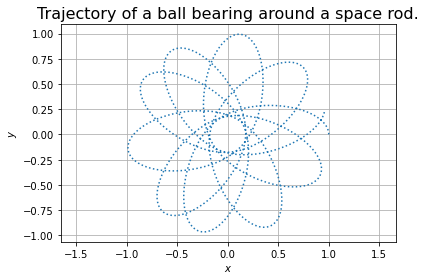

In [116]:
#plot results
plt.figure()
plt.plot(xpoints, ypoints, ':')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title('Trajectory of a ball bearing around a space rod.', fontsize=16)
plt.axis('equal')
plt.grid()
plt.show()

PARTS A AND B, NEW CODE

In [120]:
#start timer
initial = time.time()

#set constants and necessary arrays
h = 0.01
tpts = np.arange(0, 10, h)
t = 0
delta = 1e-6


r = np.array([1, 0, 0, 1], float)

xs = [r[0]]
ys = [r[1]]
ts = []
ss = []

#while t<10 caluclate the adaptive step using the RK4 method
while t < 10:
   
    k1 = 2*h*rhs(r)
    k2 = 2*h*rhs(r + 0.5*k1)
    k3 = 2*h*rhs(r + 0.5*k2)
    k4 = 2*h*rhs(r + k3)
    r2 = r + (k1+2*k2+2*k3+k4)/6
    k1 = h*rhs(r)
    k2 = h*rhs(r + 0.5*k1)
    k3 = h*rhs(r + 0.5*k2)
    k4 = h*rhs(r + k3)
    r1 = r + (k1+2*k2+2*k3+k4)/6
    k1 = h*rhs(r1)
    k2 = h*rhs(r1 + 0.5*k1)
    k3 = h*rhs(r1 + 0.5*k2)
    k4 = h*rhs(r1 + k3)
    r1 = r1 + (k1+2*k2+2*k3+k4)/6
    
    rho = h*delta/np.sqrt(((r2[0] - r1[0])/30)**2 + ((r2[1] - r1[1])/30)**2)
    h = h * rho**(1/4)

    if rho >= 1:
        xs.append(r[0])
        ys.append(r[1])
        ss.append(h)
        r = np.copy(r1)

        t += 2*h
        ts.append(t)

#end timer
final = time.time()

#Calculate and print the runtime
runtime = final - initial
print(runtime)

0.20348334312438965


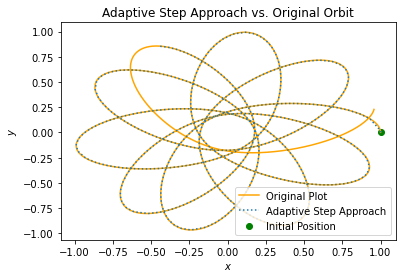

In [121]:
#Plot results
plt.scatter(1, 0, c = 'g', label = "Initial Position")
plt.plot(xpoints, ypoints, color = 'orange', label = "Original Plot")
plt.plot(xs, ys, ':', label = "Adaptive Step Approach")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Adaptive Step Approach vs. Original Orbit")

plt.legend(fontsize = '10')
plt.show()

PART C

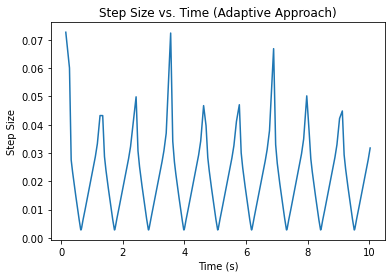

In [119]:
#Plot step size vs time for the adaptive approach
plt.plot(ts, ss)
plt.xlabel("Time (s)")
plt.ylabel("Step Size")
plt.title("Step Size vs. Time (Adaptive Approach)")
plt.show()